# **Convolutional Neural Network (CNN)**

https://sebastianraschka.com/blog/2020/intro-to-dl-ch01.html

https://towardsdatascience.com/neural-networks-basics-29cc093b82be

https://towardsdatascience.com/machine-learning-for-beginners-an-introduction-to-neural-networks-d49f22d238f9

https://medium.com/@himadrisankarchatterjee/a-basic-introduction-to-convolutional-neural-network-8e39019b27c4

## **Load packages**

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

## **Load Data**
dataset: CIFAR10

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [ ]:
train_images.shape

(50000, 32, 32, 3)

## **Create Model**

In [ ]:
model = models.Sequential()
#add three converlutional layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [ ]:
#add flatten and dense layers
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

## **Train model**

In [ ]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [ ]:
history = model.fit(train_images, train_labels, epochs=15, validation_data=(test_images, test_labels))

Epoch 1/15
1563/1563 [==============================] - 55s 35ms/step - loss: 1.5179 - accuracy: 0.4444 - val_loss: 1.2895 - val_accuracy: 0.5372
Epoch 2/15
1563/1563 [==============================] - 50s 32ms/step - loss: 1.1394 - accuracy: 0.5940 - val_loss: 1.1198 - val_accuracy: 0.5973
Epoch 3/15
1563/1563 [==============================] - 50s 32ms/step - loss: 0.9843 - accuracy: 0.6559 - val_loss: 0.9694 - val_accuracy: 0.6653
Epoch 4/15
1563/1563 [==============================] - 49s 32ms/step - loss: 0.8877 - accuracy: 0.6884 - val_loss: 0.9371 - val_accuracy: 0.6785
Epoch 5/15
1563/1563 [==============================] - 49s 32ms/step - loss: 0.8154 - accuracy: 0.7146 - val_loss: 0.8967 - val_accuracy: 0.6923
Epoch 6/15
1563/1563 [==============================] - 49s 32ms/step - loss: 0.7517 - accuracy: 0.7355 - val_loss: 0.8688 - val_accuracy: 0.6984
Epoch 7/15
1563/1563 [==============================] - 49s 32ms/step - loss: 0.6990 - accuracy: 0.7558 - val_loss: 0.8322 -

## **Evaluate model**

### **print accuarcy and loss on test dataset**

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print("loss of test dataset:"+ str(test_loss))
print("accuracy of test dataset:"+str(test_acc))

313/313 - 3s - loss: 1.0421 - accuracy: 0.7074 - 3s/epoch - 9ms/step
loss of test dataset:1.0420657396316528
accuracy of test dataset:0.7074000239372253


### **plot accuracy of each epoch on train and test dataset**

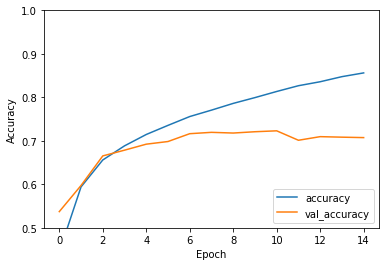

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')


### **plot loss of each epoch on train and test dataset**

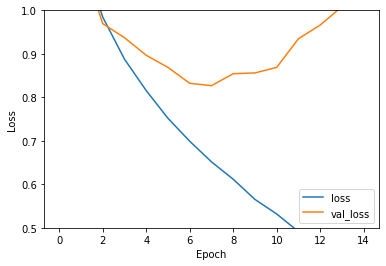

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')